# What happens when we learn the wave equation?

This file uses the driver `WaveExperiments.py`, which can run experiments in batch.

In [1]:
import WaveExperiments
import importlib
importlib.reload(WaveExperiments)
from WaveExperiments import *

In [37]:
from SimDataDB import SimDataDB

All of the results are packed into a one sqlite database, for the reader's convenience.

In [38]:
sdb = SimDataDB('results/wave.sqlite')

Type doesn't support sorting


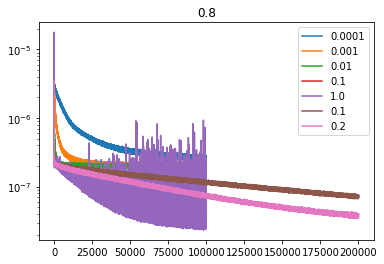

Type doesn't support sorting


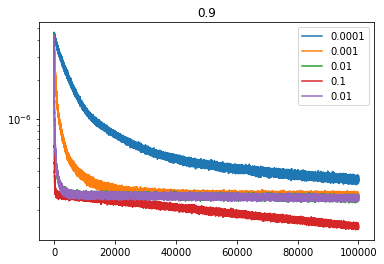

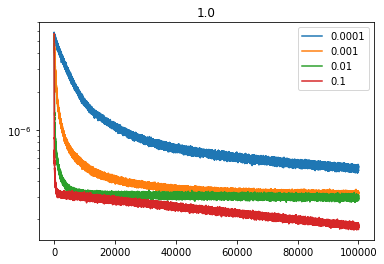

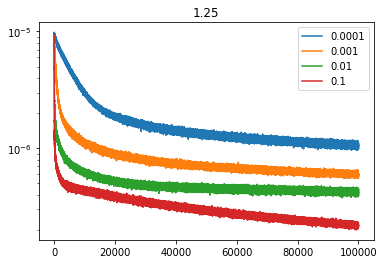

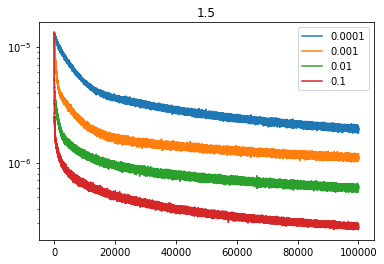

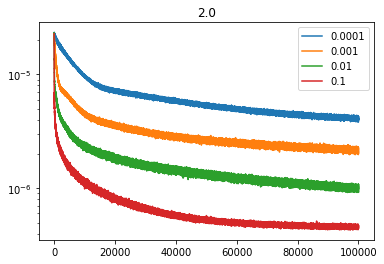

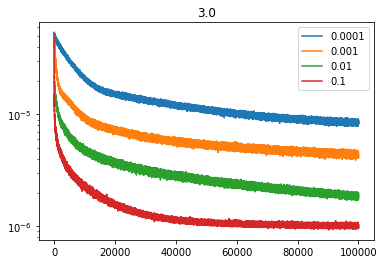

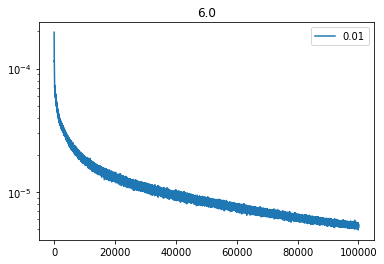

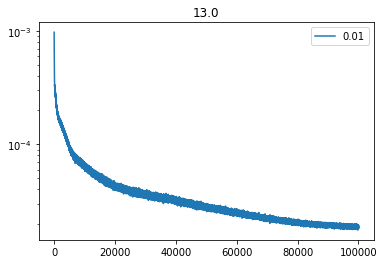

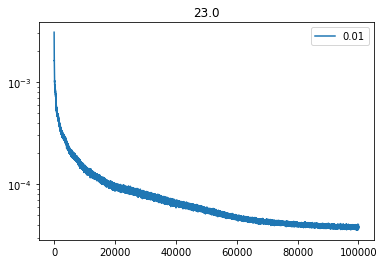

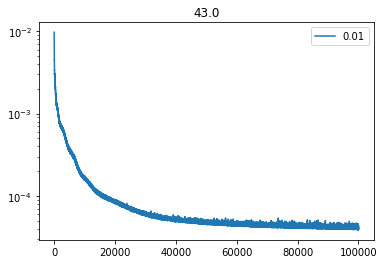

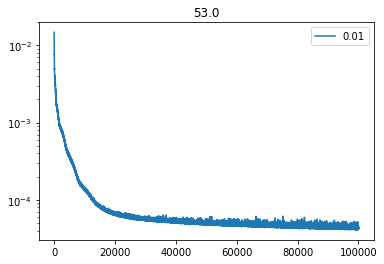

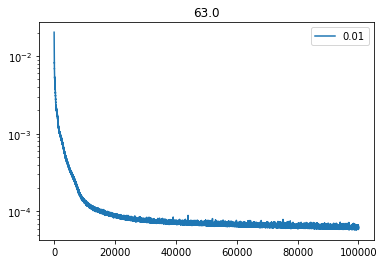

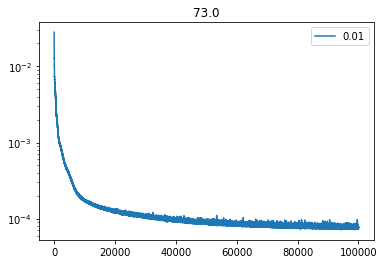

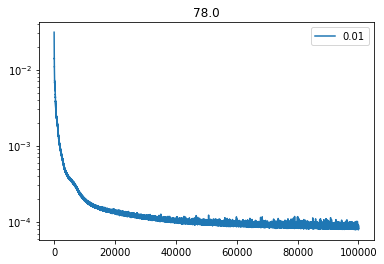

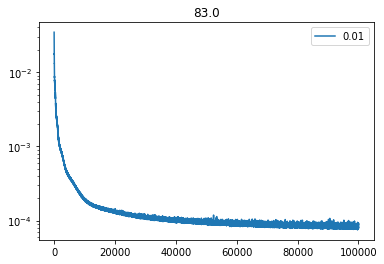

In [205]:
ts = sdb.Query('select distinct t_max from wave where meaning="ode_mr"')
for t_max, in ts:
    res = sdb.Query(f'select learning_rate,experiment from wave where meaning="ode_mr" and t_max={t_max}')
    for t,y in res:
        plt.semilogy(y.losses,label=t)
    plt.title(t_max)
    plt.legend()
    plt.show()

# What do all of the matrices look like?

## Stencils
Let's look at the values qualitatively and compare them to known discrete spatial operators. These are the traditional finite difference stencils:

In [249]:
np.linspace(0,1,10)

array([0.   , 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889,
       1.   ])

In [250]:
1/9

0.1111111111111111

In [251]:
Dx = 1.0/9.0 # confident it's 1/9
three_pt = np.array([1,-2,1])/Dx**2
five_pt = np.array([-1,16,-30,16,-1])/(12*Dx**2)
seven_pt = np.array([1/90,-3/20,3/2,-49/18,3/2,-3/20,1/90])/Dx**2
print(three_pt)
print(five_pt)
print(seven_pt)

[  81. -162.   81.]
[  -6.75  108.   -202.5   108.     -6.75]
[   0.9   -12.15  121.5  -220.5   121.5   -12.15    0.9 ]


In [187]:
def plot_stencil(experiments, which='lambda'):
    np.set_printoptions(precision=3)
    plt.figure(figsize=plotting.FIG_SIZE_FULL)
    off = 4
    if which=='lambda':
        plt.plot(np.r_[np.zeros(off-1), three_pt,np.zeros(10-off-3)], 'o-', label='known three point')
        plt.plot(np.r_[np.zeros(off-2), five_pt, np.zeros(10-off-5)], 'o-', label='known five point')
        plt.plot(np.r_[np.zeros(off-3), seven_pt], 'o-', label='known seven point')

    for exp in experiments:
        if not hasattr(exp,'all_lambdas'):
            exp.post()
        if which=='lambda':
            row = exp.all_lambdas[-1][10+off,0:10]
        else:
            row = exp.all_omegas[-1][10+off,:]
        print(exp.name(),row[off])
        plt.plot(row,'-.',label=exp.name())
    plt.legend(loc='right')
    plt.xlabel('Stencil index (5 is center)')
    plt.ylabel('A[5,j]')
    plt.show()

In [219]:
def plot_stencil_mag(meaning,gamma_L2,pwargs):
    lrs = sdb.Query(f'select distinct learning_rate from wave where meaning="{meaning}"')
    for lr, in lrs:
        res = sdb.Query(f'select t_max,experiment from wave where meaning="{meaning}" and gamma_L2={gamma_L2} and learning_rate={lr}')
        for t,exp in res:
            exp.post()
        res = sorted(res, key= lambda x : x[0])
        for off in range(4,5):
            plt.plot([t/500 for t,exp in res],[exp.all_lambdas[-1][10+off,off] for t,exp in res],label=lr,*pwargs)
    plt.legend()
    plt.hlines(three_pt[1],0,83/500)
    plt.hlines(five_pt[2],0,83/500)
    plt.hlines(seven_pt[3],0,83/500)
    plt.xlabel('Delta T')
    plt.ylabel('Stencil')

(0, 10)

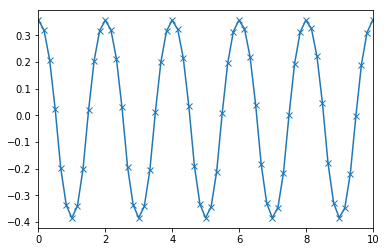

In [242]:
res = sdb.Query('select experiment,max(t_max) from wave')
exp = res[0][0]
plt.plot(exp.ts.detach().numpy(), exp.data.detach().numpy()[:,0,4],'x-')
plt.xlim(0,10)

[[0.0], [1e-07]]
mat 0.0
Type doesn't support sorting


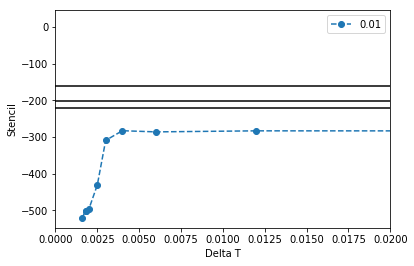

mat 1e-07
Type doesn't support sorting


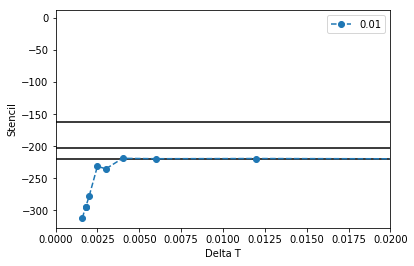

[[0.0]]
ode_e 0.0
Type doesn't support sorting


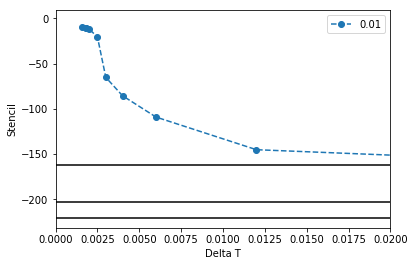

[[0.0]]
ode_emr 0.0


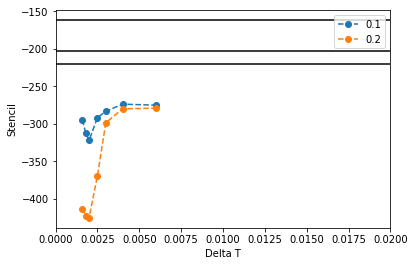

[[0.0]]
ode_mr 0.0
Type doesn't support sorting
Type doesn't support sorting


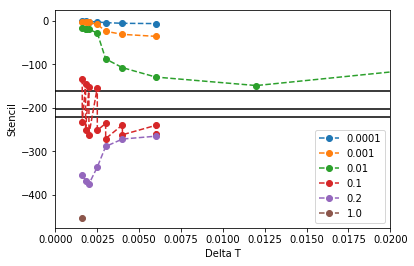

In [252]:
res = sdb.Query('select distinct meaning from wave')
for meaning, in res:
    gammas = sdb.Query(f'select distinct gamma_L2 from wave where meaning="{meaning}"')
    print(gammas)
    for gamma, in gammas:
        print(meaning, gamma)
        plt.figure()
        plot_stencil_mag(meaning,gamma,['o--'])
        plt.xlim(0,0.02)
        plt.show()

mat 0.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -520.9875492704238
mat_0.0e+00_0.0e+00_1.0e-02_250 -500.98467880105005
mat_0.0e+00_0.0e+00_1.0e-02_250 -496.383406492862
mat_0.0e+00_0.0e+00_1.0e-02_250 -431.1941842846595
mat_0.0e+00_0.0e+00_1.0e-02_250 -309.35911345114755
mat_0.0e+00_0.0e+00_1.0e-02_250 -282.9623894710214
mat_0.0e+00_0.0e+00_1.0e-02_250 -502.01394363501277


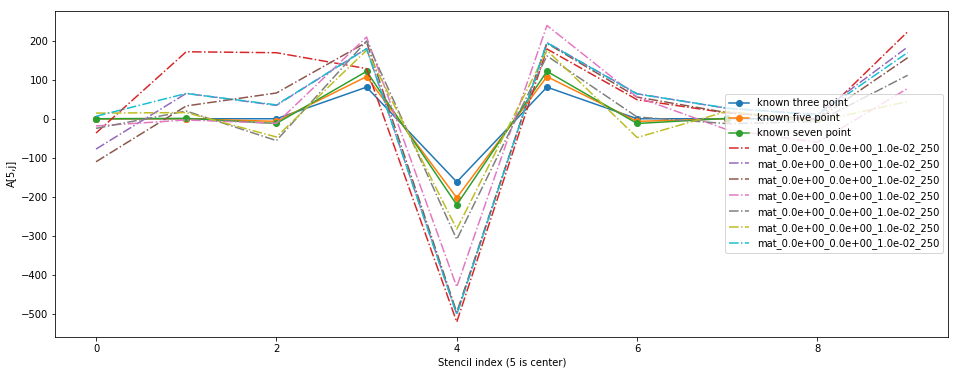

mat 1e-07
Type doesn't support sorting
mat_0.0e+00_1.0e-07_1.0e-02_250 -311.9401345512549
mat_0.0e+00_1.0e-07_1.0e-02_250 -294.30995224026594
mat_0.0e+00_1.0e-07_1.0e-02_250 -278.47578591804324
mat_0.0e+00_1.0e-07_1.0e-02_250 -231.24411511624987
mat_0.0e+00_1.0e-07_1.0e-02_250 -235.37810727499476
mat_0.0e+00_1.0e-07_1.0e-02_250 -218.92910245428033
mat_0.0e+00_1.0e-07_1.0e-02_250 -294.7491052517318


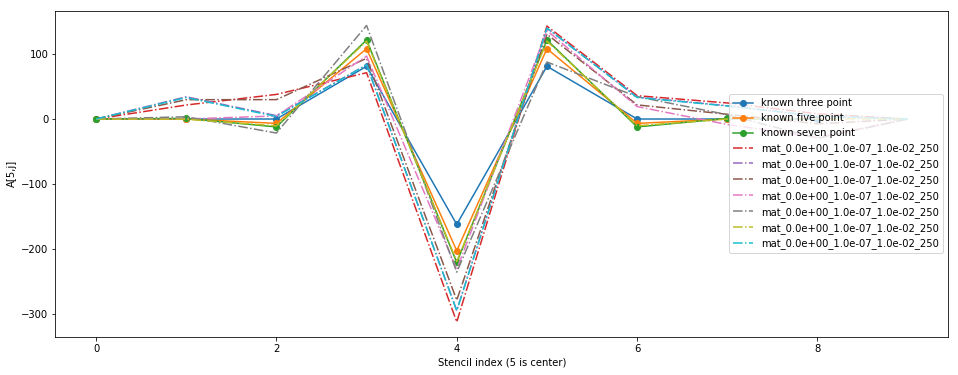

ode_e 0.0
Type doesn't support sorting
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -9.924019317825563
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -10.781850043387506
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -11.742053328912471
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -20.36850041778982
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -65.13108451066638
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -85.45770128042876
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -10.748553360527357


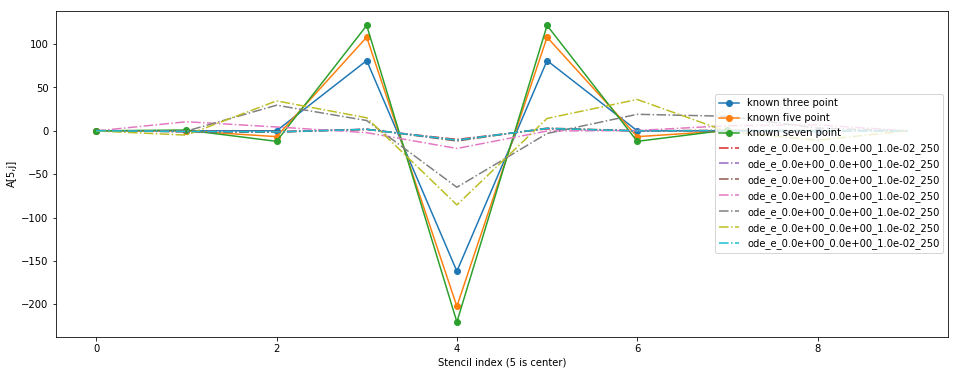

ode_emr 0.0
Type doesn't support sorting
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -294.64141529257915
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -412.6332964910726
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -312.0154442005249
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -422.1587001154275
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -321.9714186129644
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -425.1655299728006
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -291.71960973599306
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -369.17800890613785
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -283.26388930371684
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -298.42450393080236
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -273.72660526915934
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -279.91879914268014


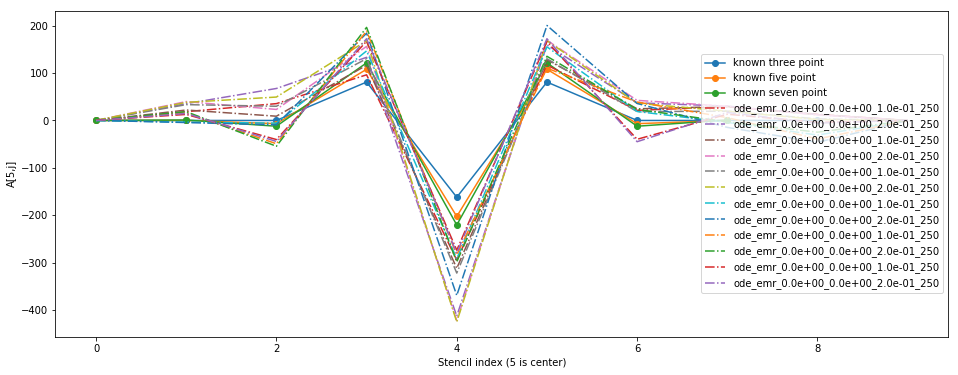

ode_mr 0.0
Type doesn't support sorting
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -18.640233319878625
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -19.89266628344113
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -28.526460620717273
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -88.04852570423117
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -107.9780099645931
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -3.594308640586553
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -1.9468989955624907
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -145.50429099485268
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -4.269050428200514
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -2.1715939267851083
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -153.4849270924035
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -8.596889721062174
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -3.1725881730751757
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -153.69135316454012
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -24.48107227333326
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -4.624078346714446
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -236.1454170956812
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 

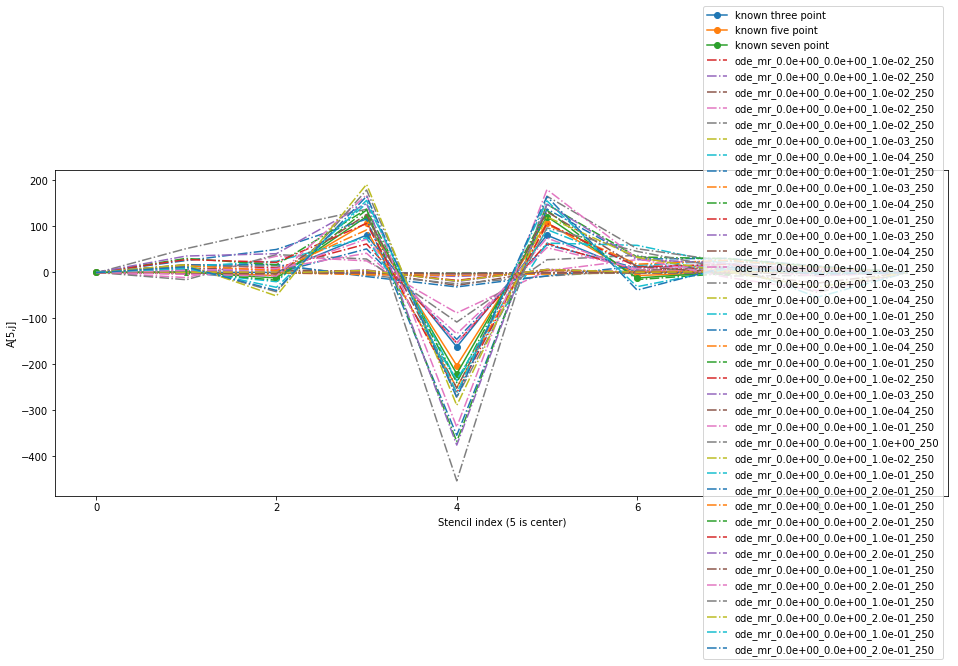

In [210]:
meanings = sdb.Query(f'select distinct meaning from wave')
for meaning, in meanings:
    gammas = sdb.Query(f'select distinct gamma_L2 from wave where meaning="{meaning}"')
    for gamma, in gammas:
        print(meaning, gamma)
        res = sdb.Query(f'select t_max,experiment from wave where meaning="{meaning}" and gamma_L2={gamma} and t_max<3')
        plot_stencil([exp for t,exp in res], 'lambda')

0.8
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.8281328425564677
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.3264468342488897
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.015910251411343588
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.027622361666375935
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.005571063212301605
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.0030024613260056046
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.21624706867194993
ode_mr_0.0e+00_0.0e+00_1.0e+00_250 -0.743117130170666
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.3838894119962574
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -0.5916393120414176
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -0.48404277987756794
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -0.680492774597804


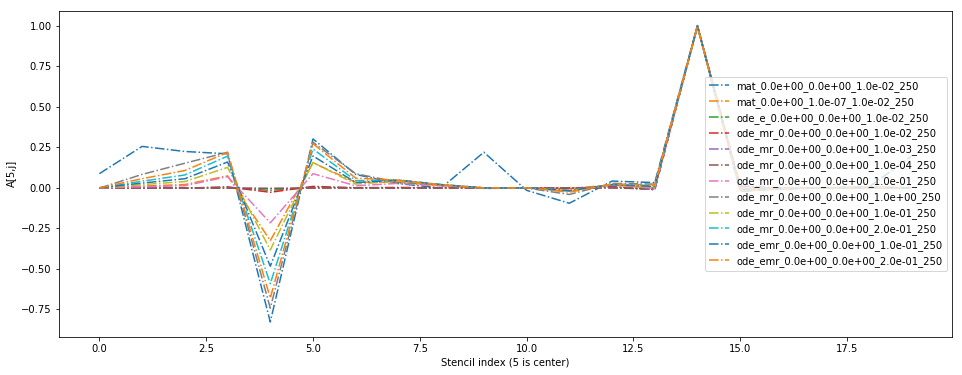

0.9
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.9037240559504077
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.33733170954231584
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.019446222523143798
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.03360935688417922
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.00648244142415254
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.003506994932636676
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.26623858204657924
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.9038448552619891
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.33814700949156035
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.019386168385720683
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.033673386746126535
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.4681554341941627
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -0.6985374091573214
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -0.5818287912911257
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -0.7866847098648728


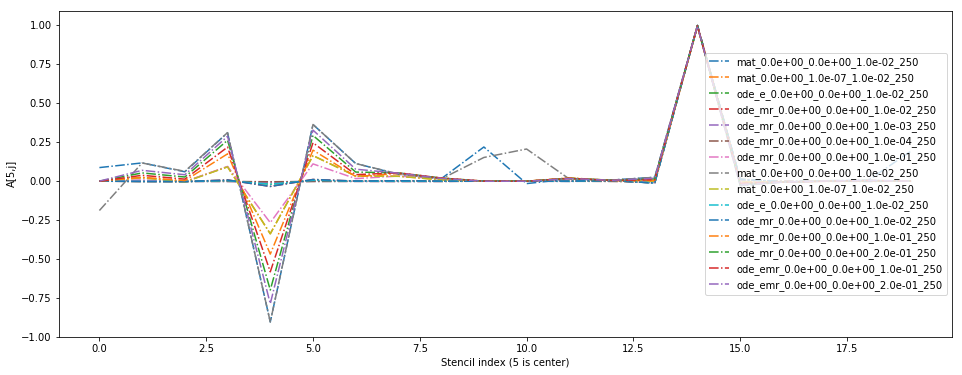

1.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.9927214717058792
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.34408410276599327
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.023531168995816573
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.039854667045808825
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.008548031256861328
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.004345478071546278
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.31413499308307724
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.5508538966819777
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -0.8006414049660593
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -0.67406652603442
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -0.8854001371571356


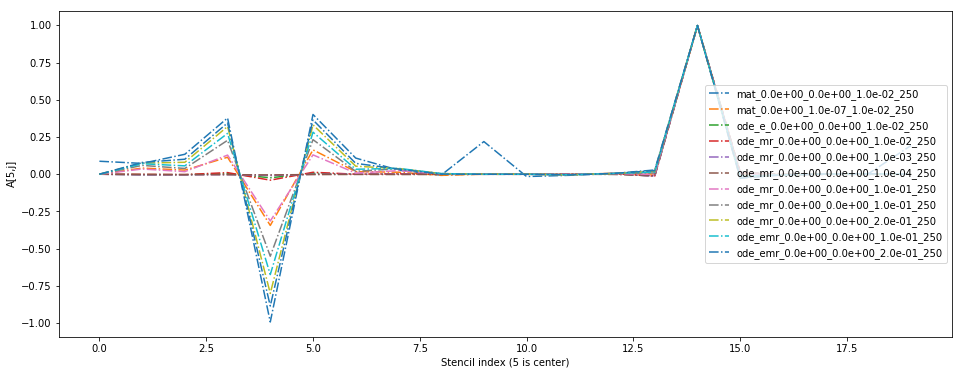

1.25
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -1.067193304410149
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.34856410877552635
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.05102329763975406
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.0711836729347804
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.021470080037535817
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.007938721149352
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.40061881276520395
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.689048042088929
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -0.9221944320715342
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -0.7869248123864476
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -0.97958959067435


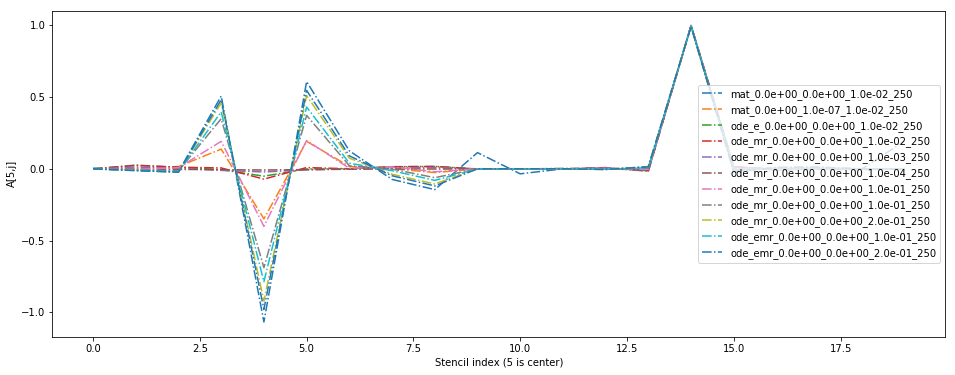

1.5
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.935716151851656
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.5785584294984111
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.19578482317835585
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.26838429990399415
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.0736214104715523
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.013897641359521923
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.763418999595431
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -0.8694145766918417
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -0.9106936694272276
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -0.8918044142556143
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -0.9242302537449412


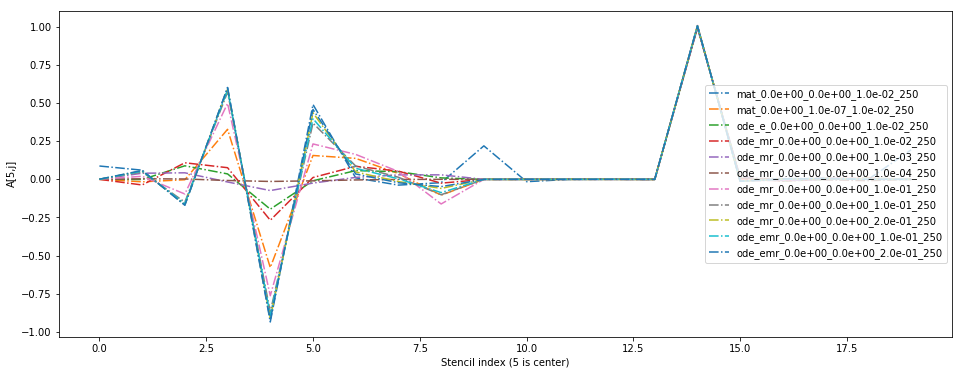

2.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -1.1338746929933818
mat_0.0e+00_1.0e-07_1.0e-02_250 -0.7133662670541807
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.3425158367953056
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.44658027237342535
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.12701612918543034
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.024672050010486907
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -1.0548368002563788
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -1.1057552971808937
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -1.1170803153843774
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -1.1225203383129783
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -1.1266956664227588


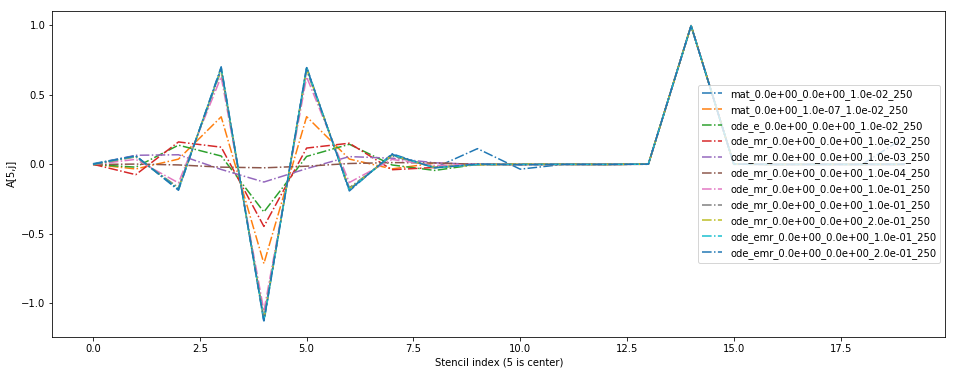

3.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -1.7150398735103225
mat_0.0e+00_1.0e-07_1.0e-02_250 -1.0638576256081884
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.6554737883957571
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.8581006892171672
ode_mr_0.0e+00_0.0e+00_1.0e-03_250 -0.22008113968279666
ode_mr_0.0e+00_0.0e+00_1.0e-04_250 -0.0408596061009109
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -1.6420712501945287
ode_mr_0.0e+00_0.0e+00_1.0e-01_250 -1.6810157199300335
ode_mr_0.0e+00_0.0e+00_2.0e-01_250 -1.6763819025652955
ode_emr_0.0e+00_0.0e+00_1.0e-01_250 -1.7008209310626856
ode_emr_0.0e+00_0.0e+00_2.0e-01_250 -1.6934556865257007


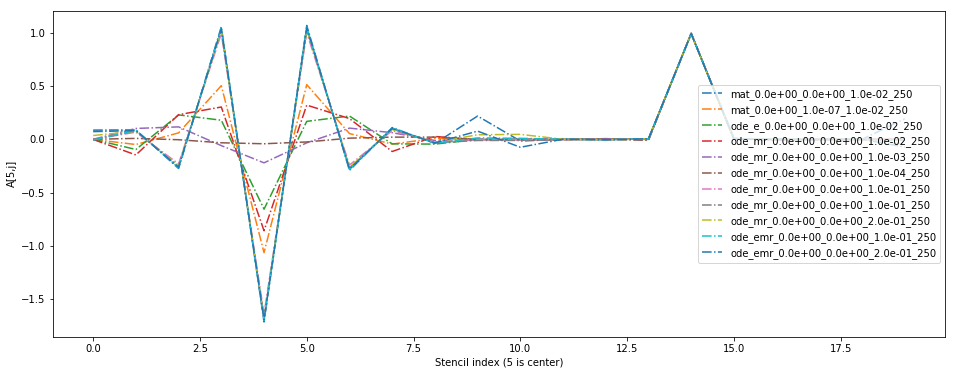

6.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -3.3623246417775063
mat_0.0e+00_1.0e-07_1.0e-02_250 -2.1194650891938522
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -1.744729473434889
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -2.4652838086294304


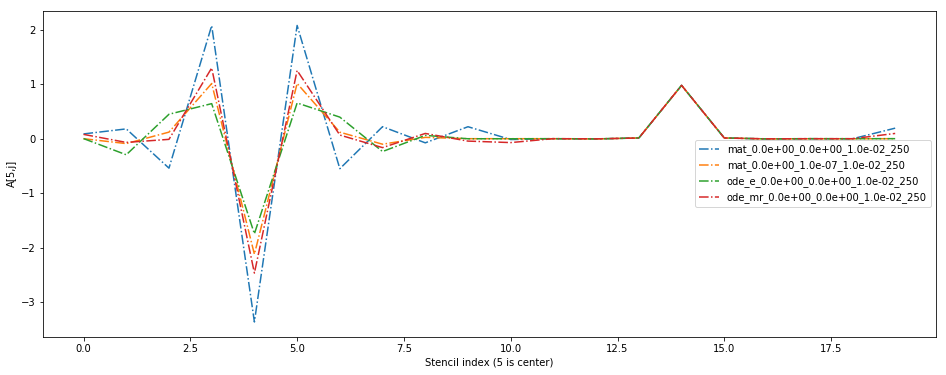

13.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -6.9343416070558295
mat_0.0e+00_1.0e-07_1.0e-02_250 -4.394451825099049
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -4.052908476461819
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -6.277140268928842


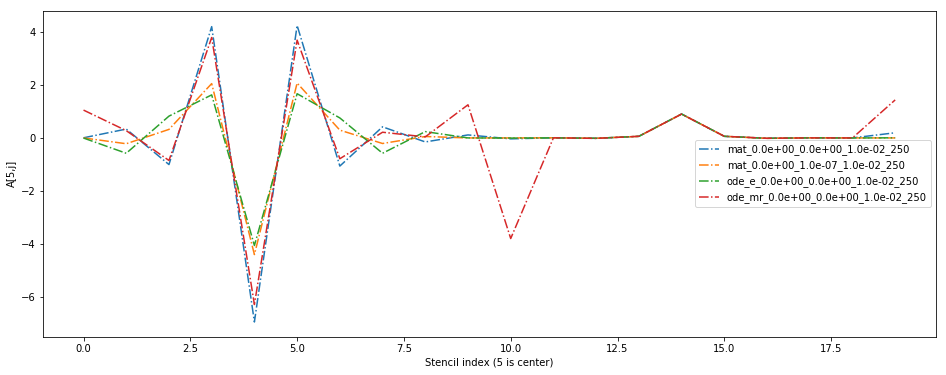

23.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -10.665076867230267
mat_0.0e+00_1.0e-07_1.0e-02_250 -6.928558631365509
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -6.7372033286414945
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -10.329425758017177


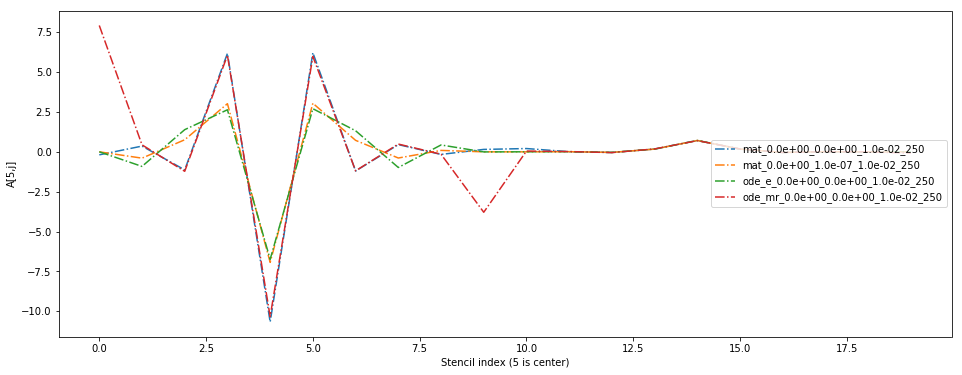

43.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -11.708965244277968
mat_0.0e+00_1.0e-07_1.0e-02_250 -8.365955025019327
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -9.192844602227863
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -11.318520677212069


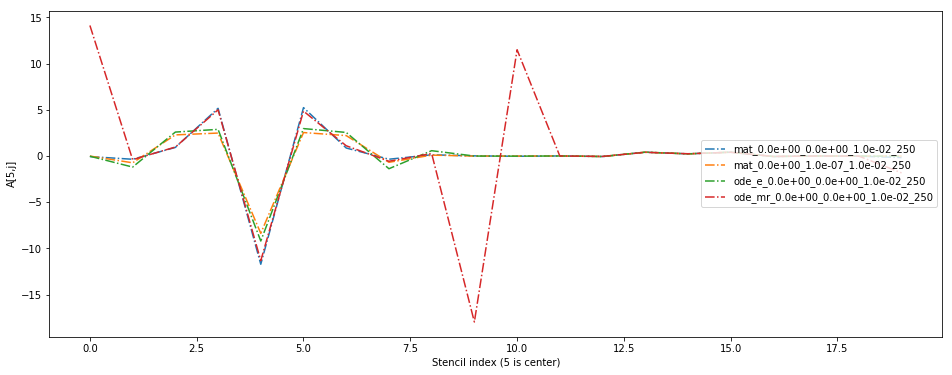

53.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -8.922739100877266
mat_0.0e+00_1.0e-07_1.0e-02_250 -7.141519079282451
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -8.009964711134517
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -7.980713792586678


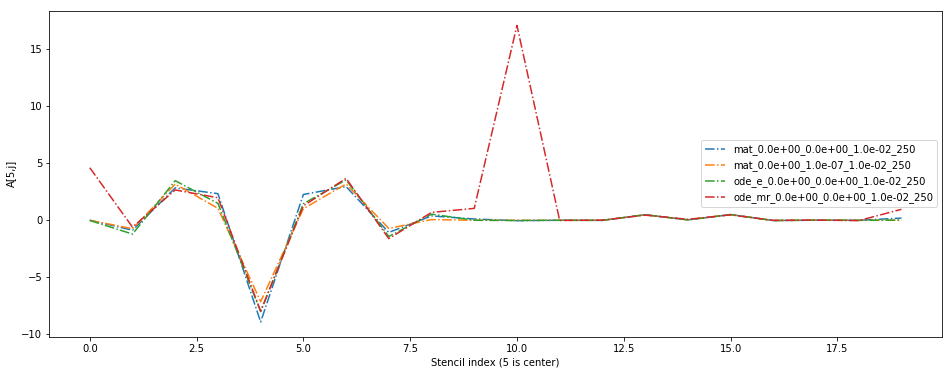

63.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -5.313341660842331
mat_0.0e+00_1.0e-07_1.0e-02_250 -5.317625528979023
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -5.461997090558336
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -4.844673912668505


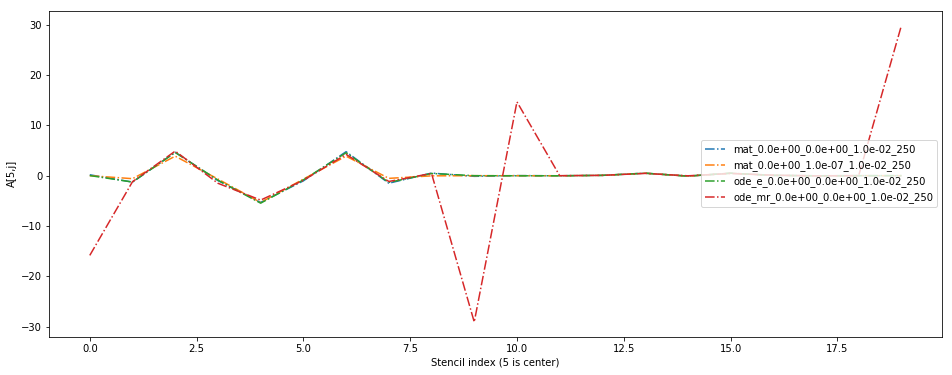

73.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -1.7148549477558417
mat_0.0e+00_1.0e-07_1.0e-02_250 -3.2475779864233147
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -2.678987394827386
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -2.162791967679728


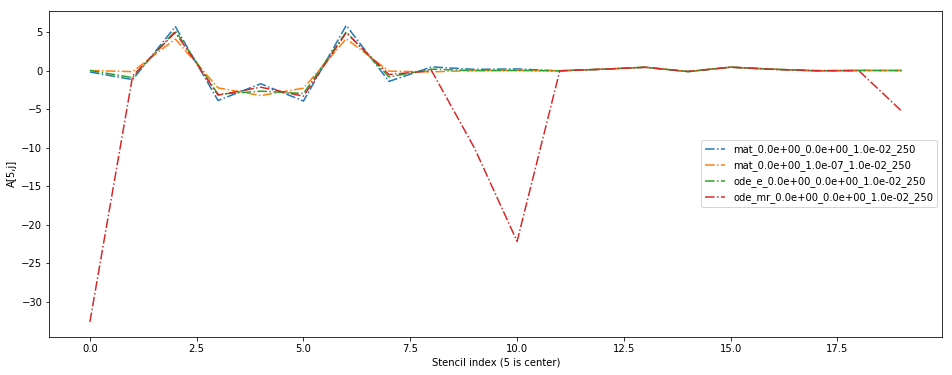

78.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 -0.08976736615279553
mat_0.0e+00_1.0e-07_1.0e-02_250 -2.2345570109768764
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -1.4237501813890883
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 -0.4481456634647967


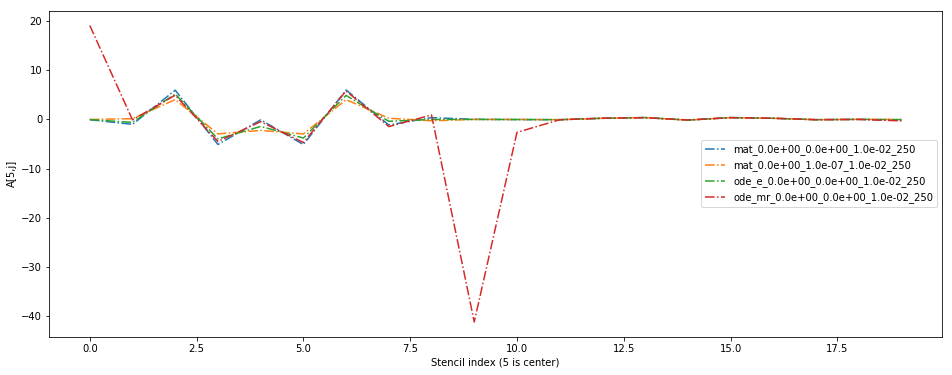

83.0
Type doesn't support sorting
mat_0.0e+00_0.0e+00_1.0e-02_250 1.1921020604314965
mat_0.0e+00_1.0e-07_1.0e-02_250 -1.3391850394645974
ode_e_0.0e+00_0.0e+00_1.0e-02_250 -0.3327085927377744
ode_mr_0.0e+00_0.0e+00_1.0e-02_250 0.4644826257212027


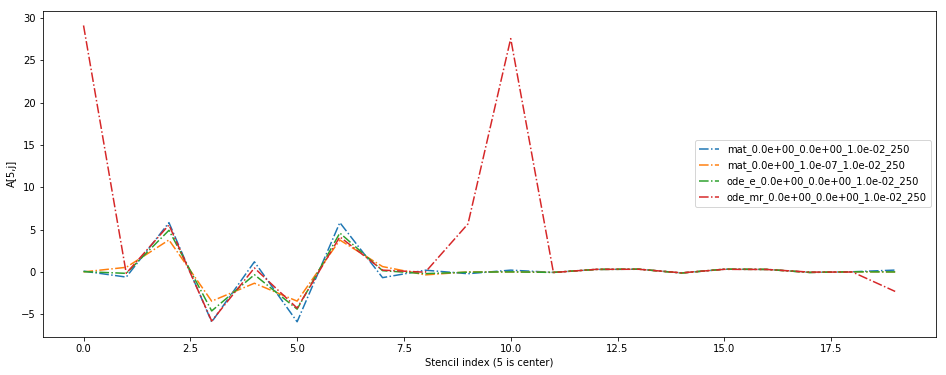

In [211]:
dts = sdb.Query(f'select distinct t_max from wave')
for dt, in dts:
    print(dt)
    res = sdb.Query(f'select meaning,experiment from wave where t_max="{dt}"')
    plot_stencil([exp for mean,exp in res], 'omega')

## How well do they integrate the equations?

The fact that the scale on the ODE_MR methods is off means I need to test if my expectations are wrong, or if the method isn't training right. So, let me integrate it.

In [212]:
models = sdb.Query(f'select t_max,experiment from wave where meaning="ode_mr"')

Type doesn't support sorting


0.9 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


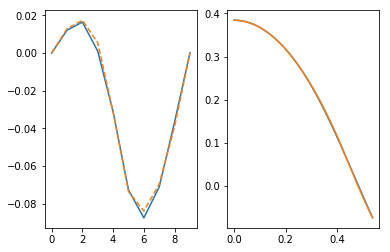

1.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


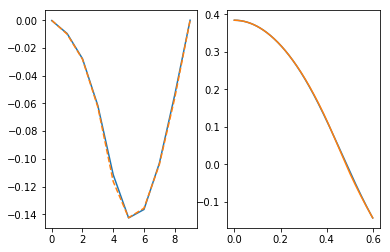

1.25 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


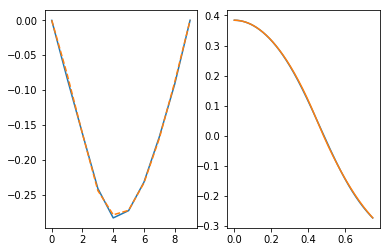

1.5 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


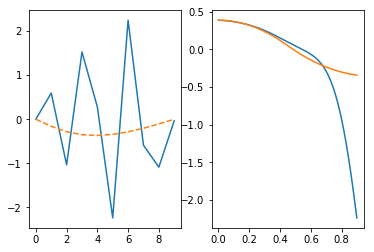

2.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


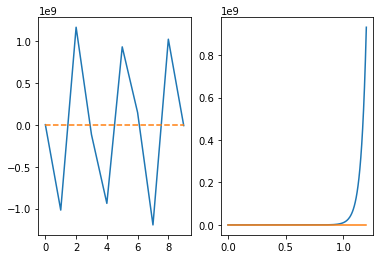

3.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


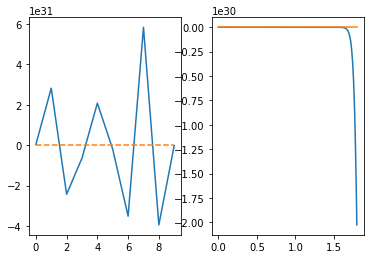

6.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


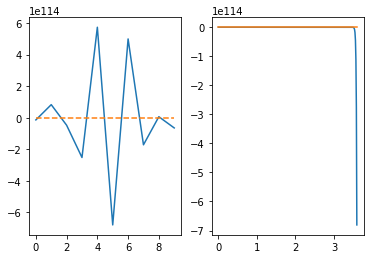

13.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


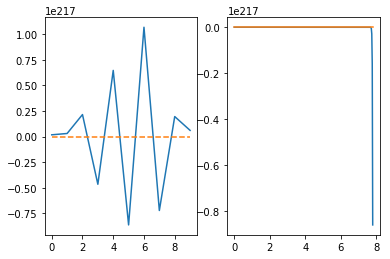

23.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


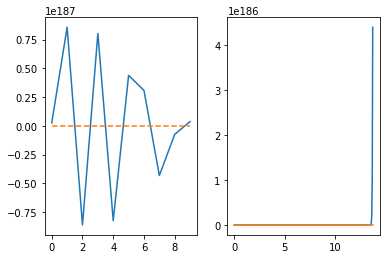

43.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


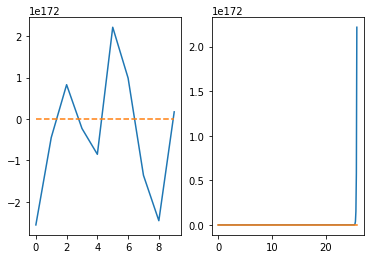

53.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


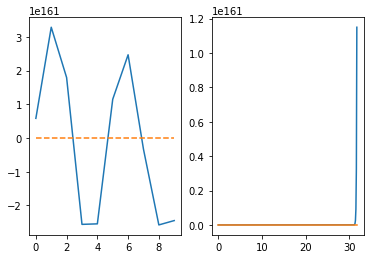

63.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


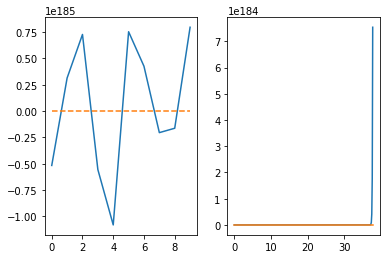

73.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


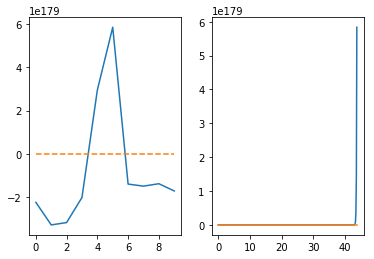

78.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


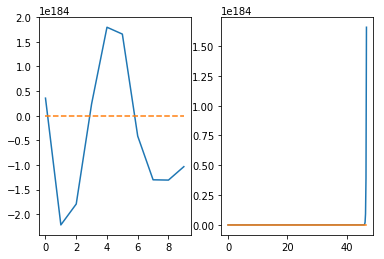

83.0 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


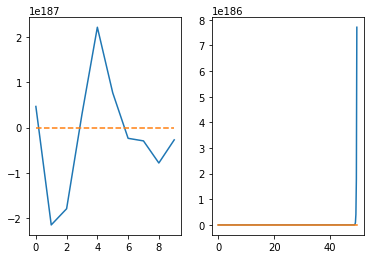

0.9 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


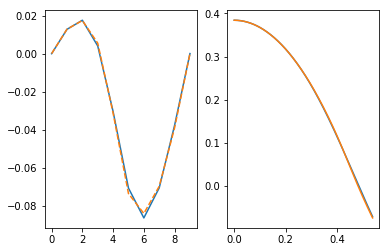

0.9 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


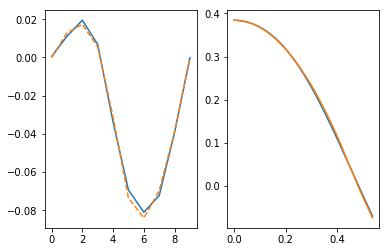

0.9 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


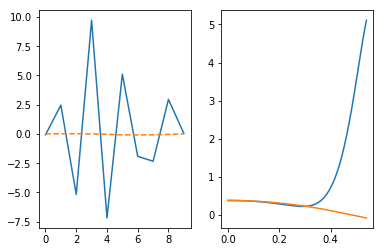

1.0 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


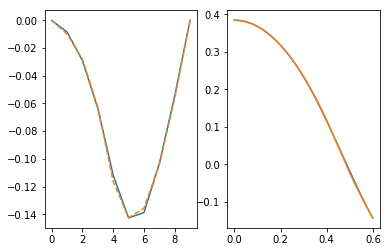

1.0 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


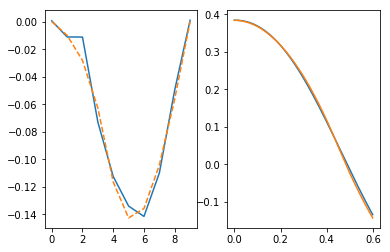

1.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


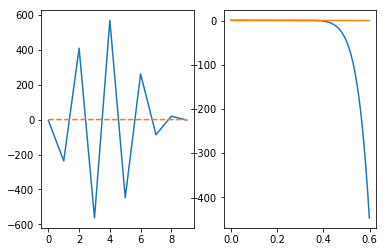

1.25 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


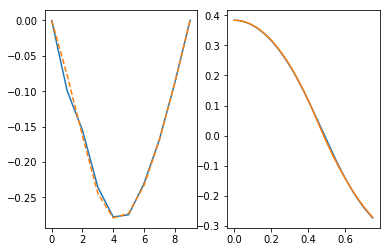

1.25 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


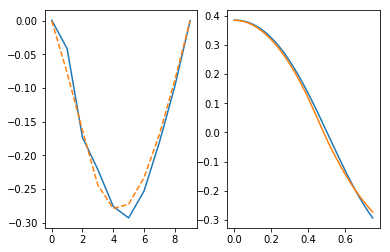

1.25 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


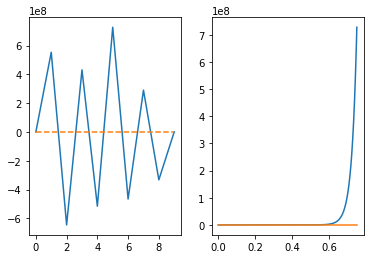

1.5 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


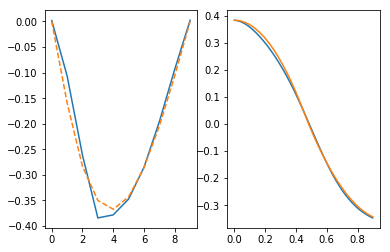

1.5 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


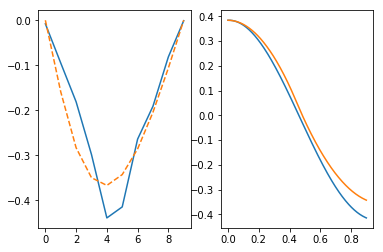

1.5 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


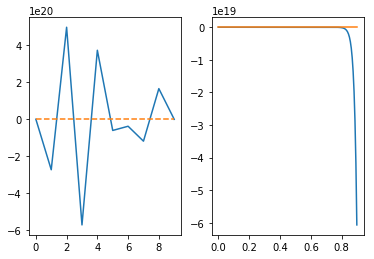

2.0 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


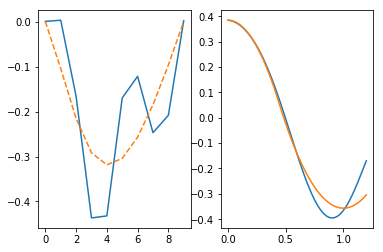

2.0 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


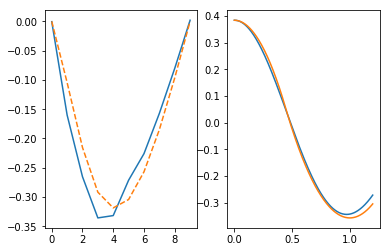

2.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


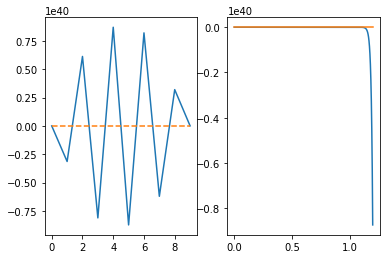

3.0 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


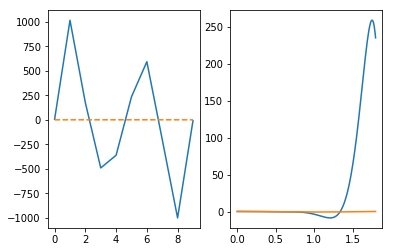

3.0 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


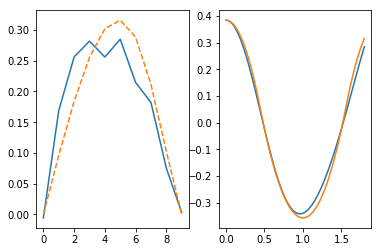

3.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


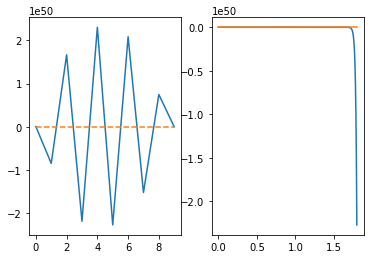

0.8 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


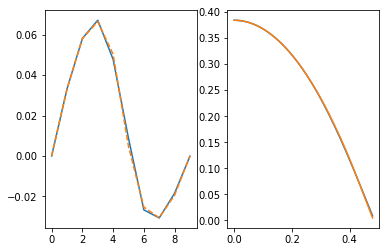

0.8 ode_mr_0.0e+00_0.0e+00_1.0e-03_250


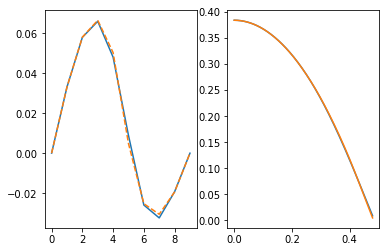

0.8 ode_mr_0.0e+00_0.0e+00_1.0e-04_250


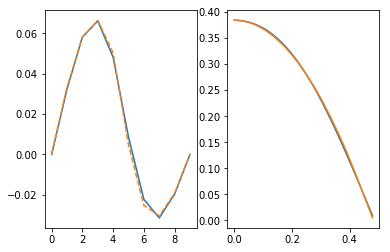

0.8 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


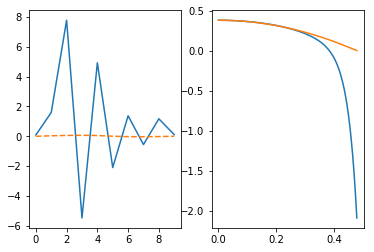

0.8 ode_mr_0.0e+00_0.0e+00_1.0e+00_250


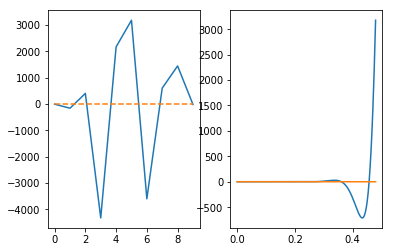

0.9 ode_mr_0.0e+00_0.0e+00_1.0e-02_250


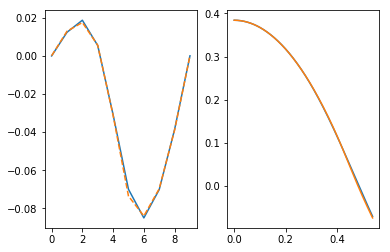

0.8 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


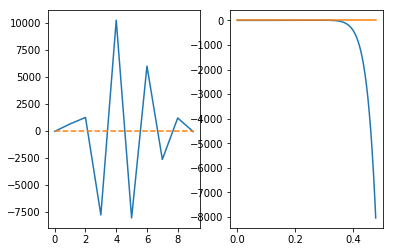

0.8 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


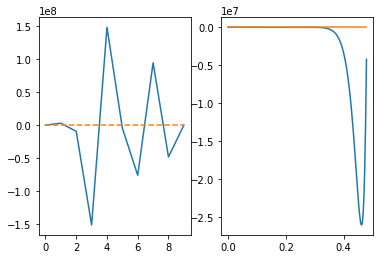

0.9 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


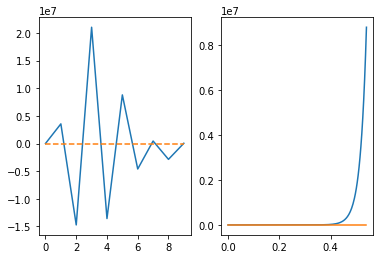

0.9 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


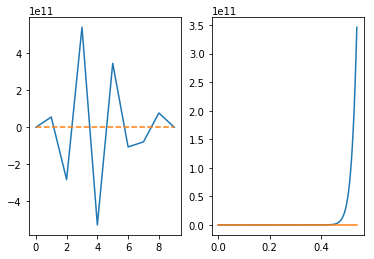

1.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


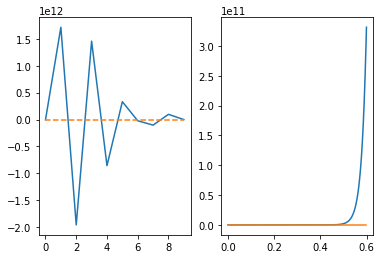

1.0 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


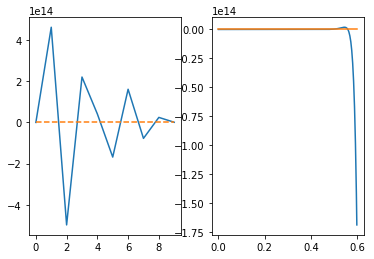

1.25 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


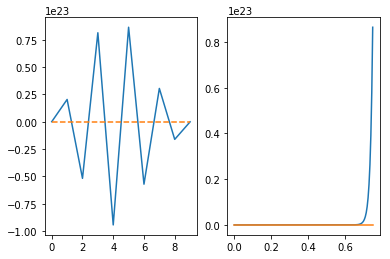

1.25 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


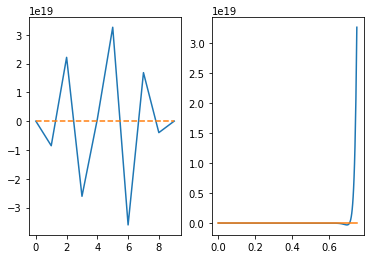

1.5 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


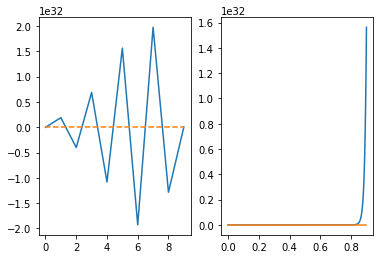

1.5 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


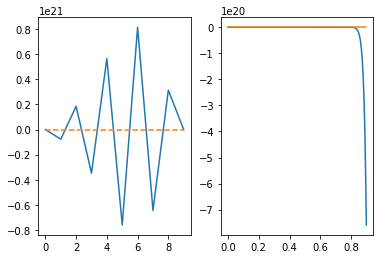

2.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


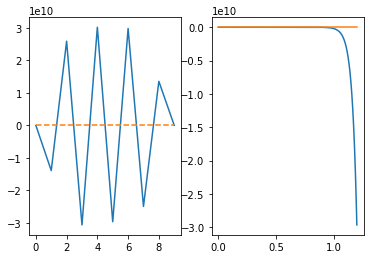

2.0 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


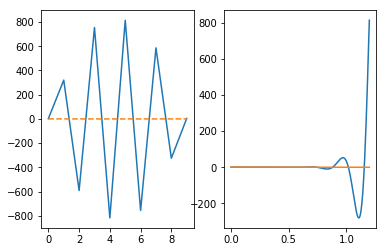

3.0 ode_mr_0.0e+00_0.0e+00_1.0e-01_250


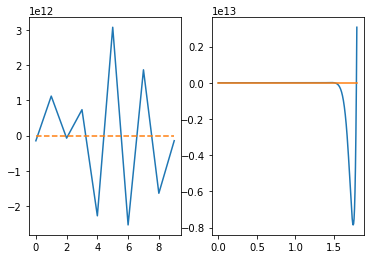

3.0 ode_mr_0.0e+00_0.0e+00_2.0e-01_250


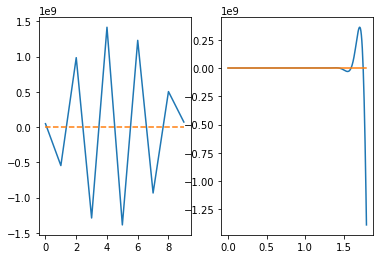

In [244]:
for t_max,exp in models:
    model = exp.model
    N = 300
    res = torchdiffeq.odeint(model,exp.data[0,:,:],exp.ts[:N],method='rk4')
    print(t_max,exp.name())
    plt.subplot(1,2,1)
    plt.plot(res.detach().numpy()[N-1,0,:])
    plt.plot(exp.data.detach().numpy()[N-1,0,:],'--')
    plt.subplot(1,2,2)
    plt.plot(exp.ts.detach().numpy()[:N],res.detach().numpy()[:,0,5])
    plt.plot(exp.ts.detach().numpy()[:N],exp.data.detach().numpy()[:N,0,5])
    plt.show()

In [ ]:
exp.